### Part A

In [ ]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as mp
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
import seaborn as sns
import xgboost
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.base import BaseEstimator, TransformerMixin
from statistics import median
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')

#### Importing the training data 

In [2]:
p3_train_df = pd.read_csv('/Users/gayathri/Downloads/CE802_P3_Data/CE802_P3_Data.csv')

In [3]:
p3_train_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,854.04,-15267.84,193.04,12132.20,464.22,-19.81,920.42,11.84,-38.02,8.35,...,-100.43,10497.32,8,-46.22,91.89,-41.70,-849.78,-5.12,4261.68,609.09
1,1748.76,-4299.45,439.72,18046.14,540.36,-8.55,1913.78,11.28,122.02,-8.83,...,-97.41,16792.88,4,51.24,-450.34,-75.30,-1801.59,-0.16,2737.58,232.66
2,834.44,-18927.93,-85.86,18533.56,611.34,-15.88,1956.90,10.00,-24.26,-54.33,...,-135.59,-5647.94,6,40.93,-471.02,-55.50,-2529.75,8.50,3696.64,480.01
3,1429.36,3653.73,-59.69,31314.52,408.45,-9.67,1628.18,11.59,90.88,-38.87,...,-85.77,6869.46,2,-9.19,-290.45,-67.86,-2915.34,9.76,2919.54,1685.20
4,188.80,-3932.07,128.70,22837.34,530.22,-14.93,1218.16,9.55,-93.78,-61.95,...,-75.76,16974.08,2,100.86,-850.10,-64.95,-2154.12,13.42,2693.48,617.96


#### Data Type of each feature

In [4]:
p3_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   int64  
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   object 
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

#### Description of data in training set

In [5]:
p3_train_df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000
mean,847.011520,-11736.908600,-236.076500,24903.095547,569.654240,-13.881793,1701.127373,10.154180,-15.809880,-55.084673,...,-116.321787,7402.949867,7.954667,-12.847560,-397.265347,-57.938820,-1636.51510,5.444893,3598.854547,856.493547
std,595.115533,9055.633907,299.256174,5930.199404,129.856996,4.227795,591.284001,4.214935,82.215588,29.895706,...,41.155295,5949.554732,3.511623,44.360757,433.264391,12.475389,921.61161,5.969597,845.754592,1222.860406
min,-1271.540000,-43559.910000,-1466.300000,4409.780000,24.180000,-35.660000,34.980000,-8.260000,-398.680000,-152.810000,...,-310.520000,-9729.680000,0.000000,-271.950000,-2440.880000,-112.020000,-4215.09000,-17.040000,-1023.920000,-2685.920000
25%,441.435000,-17835.667500,-430.190000,20806.395000,501.300000,-15.887500,1297.590000,8.050000,-57.015000,-75.012500,...,-137.115000,3548.705000,6.000000,-33.357500,-618.370000,-64.650000,-2263.79250,1.595000,3188.555000,17.235000
50%,858.350000,-11634.240000,-236.735000,25064.170000,567.705000,-13.905000,1716.700000,10.180000,-16.330000,-55.550000,...,-116.610000,7472.750000,8.000000,-13.585000,-388.210000,-58.260000,-1655.11500,5.390000,3611.660000,624.735000
75%,1249.025000,-5991.990000,-40.250000,28904.100000,633.570000,-11.835000,2095.695000,12.155000,25.970000,-35.190000,...,-96.100000,11456.320000,10.000000,8.727500,-182.065000,-51.390000,-1013.64750,9.585000,4009.675000,1609.167500
max,2769.660000,22545.330000,789.330000,47069.100000,1194.480000,12.230000,3640.980000,27.750000,331.620000,53.450000,...,95.310000,28498.440000,22.000000,192.920000,1832.770000,15.810000,1111.38000,22.960000,8670.120000,3836.440000


#### Heatmap for finding correlation

<AxesSubplot:>

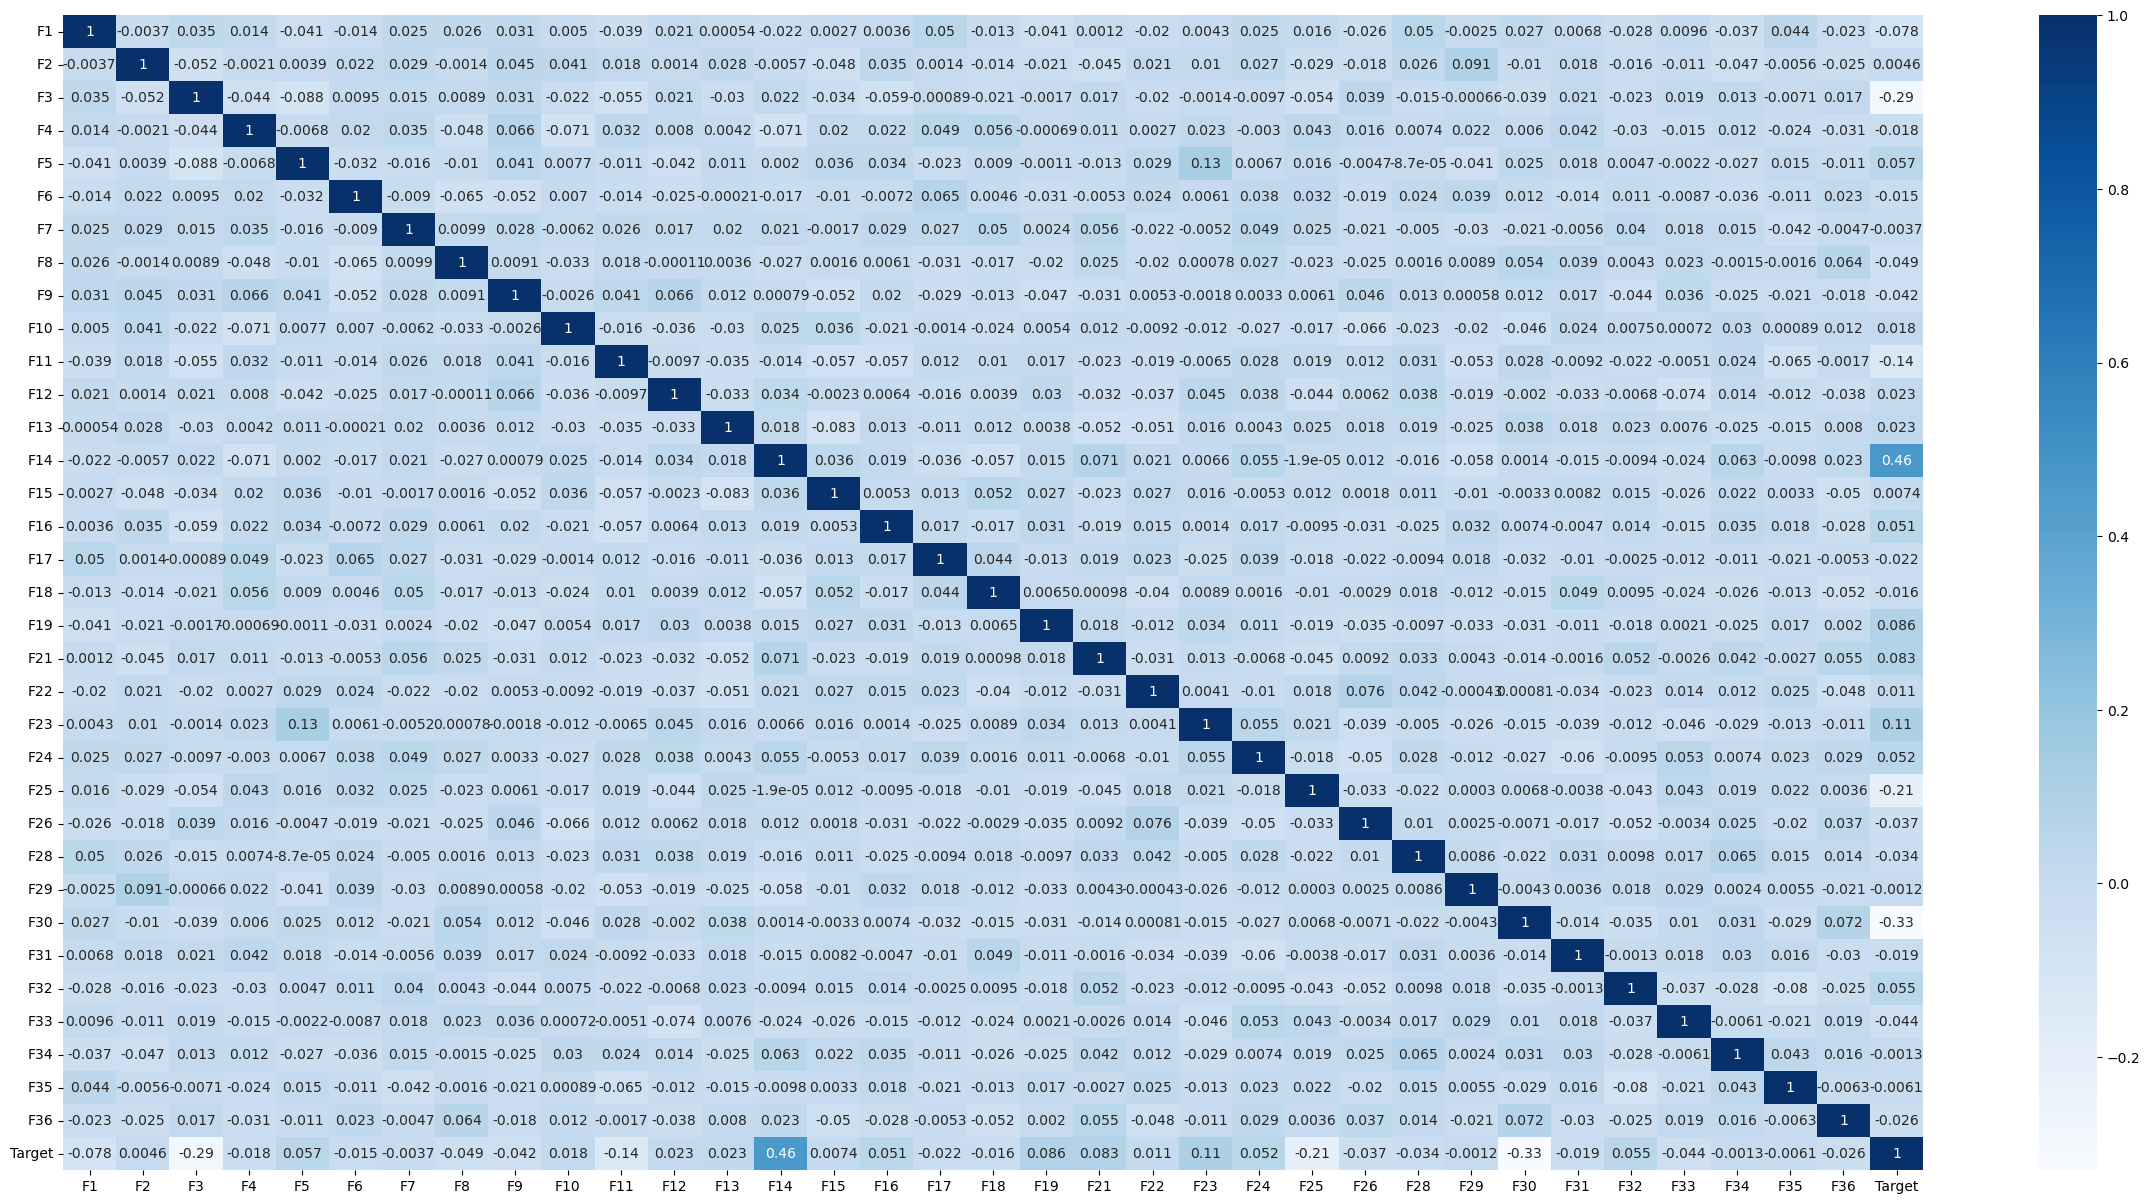

In [6]:
mp.figure(figsize=(30,15))
crln=p3_train_df.corr()
sns.heatmap(crln,xticklabels=crln.columns,yticklabels=crln.columns,annot=True, cmap="Blues")

#### Null Value Check

In [7]:
p3_train_df.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
F35       0
F36       0
Target    0
dtype: int64

#### Checking unique values

In [8]:
p3_train_df.nunique()

F1        1494
F2        1498
F3        1495
F4        1500
F5        1421
F6         889
F7        1485
F8         911
F9        1423
F10       1382
F11         11
F12       1485
F13       1410
F14        732
F15        723
F16        905
F17        900
F18       1500
F19       1492
F20          5
F21       1406
F22       1412
F23        737
F24       1396
F25       1499
F26       1402
F27          4
F28       1409
F29       1499
F30         12
F31       1409
F32       1494
F33        910
F34       1492
F35        839
F36       1487
Target    1497
dtype: int64

In [9]:
p3_train_df.tail()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
1495,987.12,4369.68,-223.67,25595.70,395.58,-14.05,2503.50,13.57,10.14,-36.93,...,-95.59,9304.98,10,-7.54,-845.24,-71.10,-1960.50,9.02,3062.52,1057.77
1496,966.92,-12845.01,-735.65,25065.72,613.14,-15.62,859.76,11.04,43.12,-69.32,...,-129.22,16906.02,10,16.42,-360.75,-60.21,-753.06,-1.60,4167.22,1232.01
1497,860.70,-641.70,-393.30,31577.66,577.62,-9.49,617.64,5.80,-63.68,-89.18,...,-201.85,4687.12,10,-60.35,-477.90,-60.36,-1749.51,20.26,4466.74,2037.64
1498,428.82,-16169.43,-84.49,26820.44,555.30,-11.96,1631.22,9.80,-172.42,-27.69,...,-133.37,9937.10,8,-16.85,-458.68,-42.75,-1714.83,8.90,3599.06,-27.86
1499,753.78,10536.00,-238.10,34668.58,557.04,-17.71,2344.28,25.30,97.58,-101.30,...,-65.15,21663.04,2,0.39,-620.86,-59.76,-3509.94,15.88,4241.28,1012.31


#### Finding catergorical values in the dataset

In [10]:
p3_train_df.describe(include=np.object)

,F20,F27
count,1500,1500
unique,5,4
top,Very low,Europe
freq,307,393


#### Removing Duplicates

In [11]:
p3_train_df.drop_duplicates(subset=["F1", "F2", "F3","F4","F5","F6", "F7", "F8","F9", "F10","F11","F12","F13", "F14", "F15", "F16","F17", "F18", "F19","F20","F21","F22","F23","F24","F25","F26","F28","F29","F30","F31","F32","F33","F34","F35","F36"])

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,854.04,-15267.84,193.04,12132.20,464.22,-19.81,920.42,11.84,-38.02,8.35,...,-100.43,10497.32,8,-46.22,91.89,-41.70,-849.78,-5.12,4261.68,609.09
1,1748.76,-4299.45,439.72,18046.14,540.36,-8.55,1913.78,11.28,122.02,-8.83,...,-97.41,16792.88,4,51.24,-450.34,-75.30,-1801.59,-0.16,2737.58,232.66
2,834.44,-18927.93,-85.86,18533.56,611.34,-15.88,1956.90,10.00,-24.26,-54.33,...,-135.59,-5647.94,6,40.93,-471.02,-55.50,-2529.75,8.50,3696.64,480.01
3,1429.36,3653.73,-59.69,31314.52,408.45,-9.67,1628.18,11.59,90.88,-38.87,...,-85.77,6869.46,2,-9.19,-290.45,-67.86,-2915.34,9.76,2919.54,1685.20
4,188.80,-3932.07,128.70,22837.34,530.22,-14.93,1218.16,9.55,-93.78,-61.95,...,-75.76,16974.08,2,100.86,-850.10,-64.95,-2154.12,13.42,2693.48,617.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,987.12,4369.68,-223.67,25595.70,395.58,-14.05,2503.50,13.57,10.14,-36.93,...,-95.59,9304.98,10,-7.54,-845.24,-71.10,-1960.50,9.02,3062.52,1057.77
1496,966.92,-12845.01,-735.65,25065.72,613.14,-15.62,859.76,11.04,43.12,-69.32,...,-129.22,16906.02,10,16.42,-360.75,-60.21,-753.06,-1.60,4167.22,1232.01
1497,860.70,-641.70,-393.30,31577.66,577.62,-9.49,617.64,5.80,-63.68,-89.18,...,-201.85,4687.12,10,-60.35,-477.90,-60.36,-1749.51,20.26,4466.74,2037.64
1498,428.82,-16169.43,-84.49,26820.44,555.30,-11.96,1631.22,9.80,-172.42,-27.69,...,-133.37,9937.10,8,-16.85,-458.68,-42.75,-1714.83,8.90,3599.06,-27.86


#### Distribution of data in the dataset

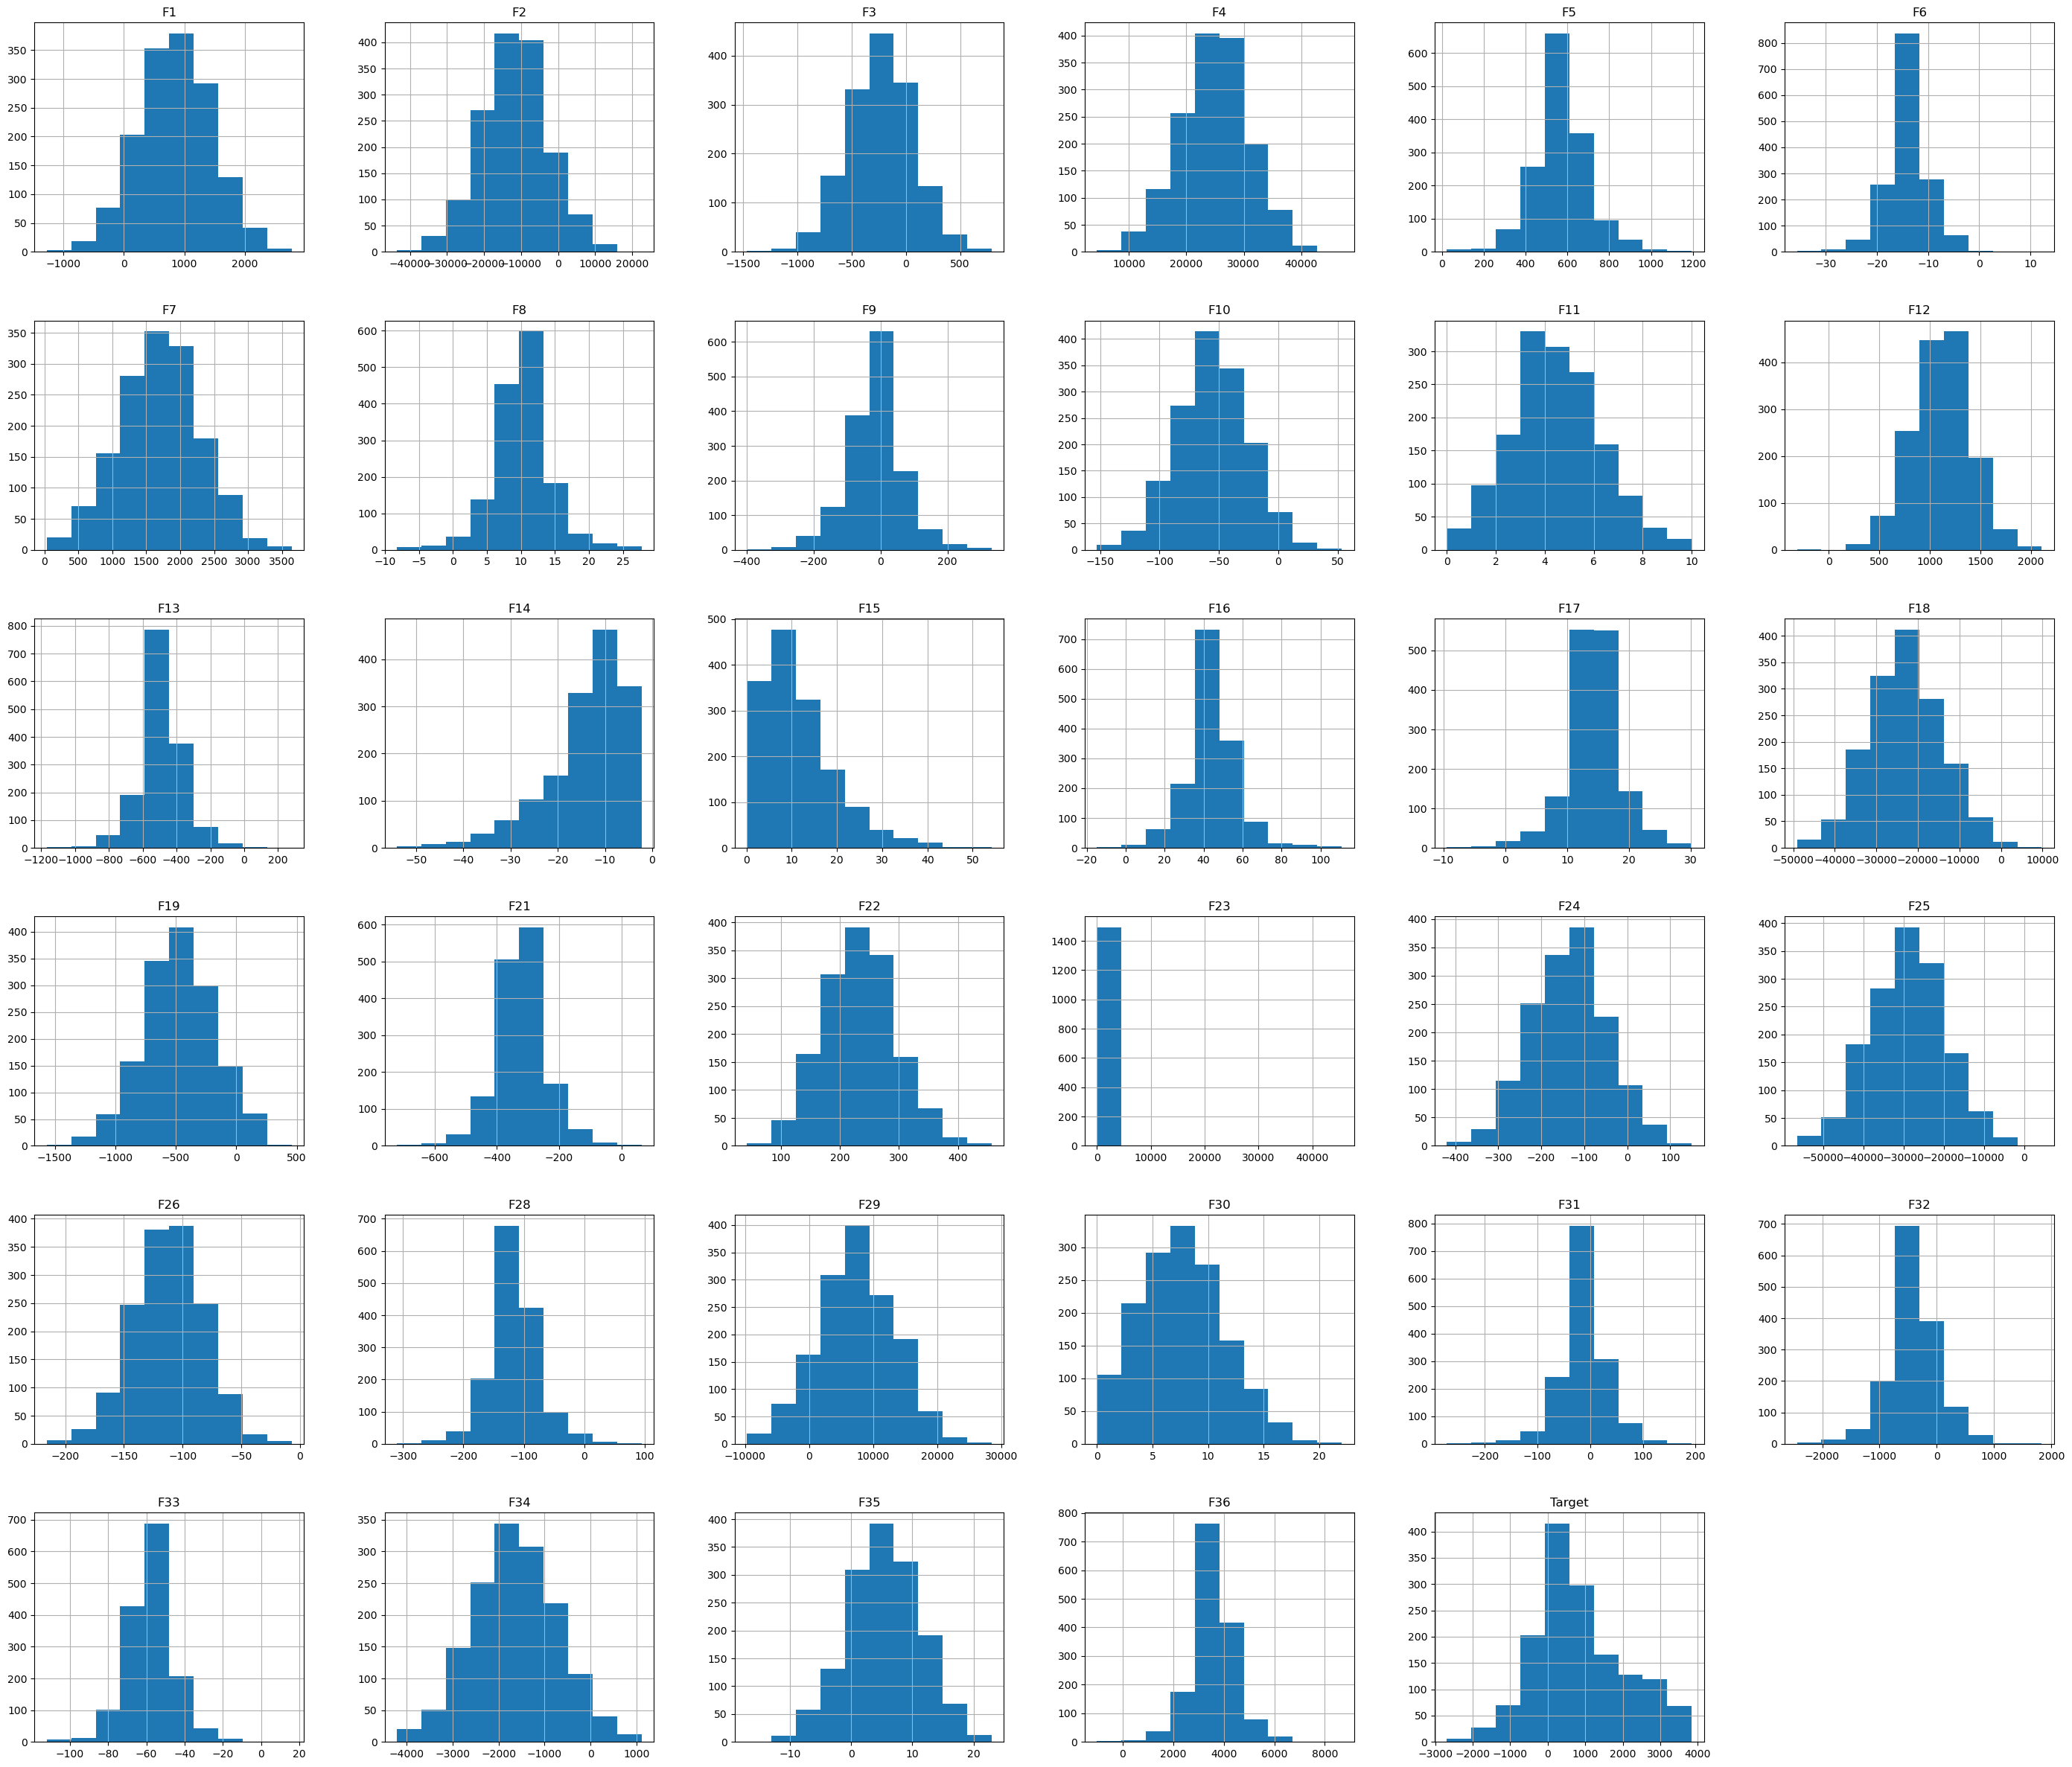

In [12]:
p3_train_df.hist(figsize=(35,30))
mp.show()

#### Replacing categorical values with neumerical

In [13]:
p3_train_df = pd.get_dummies(p3_train_df, columns= ['F27'])                                       
cleanup = {'F20': {'Very low': 0,'Medium':2, 'Very high':4, 'Low':1,'High':3}}
p3_train_df.replace(cleanup, inplace=True)
p3_train_df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F32,F33,F34,F35,F36,Target,F27_Europe,F27_Rest,F27_UK,F27_USA
0,854.04,-15267.84,193.04,12132.20,464.22,-19.81,920.42,11.84,-38.02,8.35,...,91.89,-41.70,-849.78,-5.12,4261.68,609.09,0,1,0,0
1,1748.76,-4299.45,439.72,18046.14,540.36,-8.55,1913.78,11.28,122.02,-8.83,...,-450.34,-75.30,-1801.59,-0.16,2737.58,232.66,0,0,0,1
2,834.44,-18927.93,-85.86,18533.56,611.34,-15.88,1956.90,10.00,-24.26,-54.33,...,-471.02,-55.50,-2529.75,8.50,3696.64,480.01,0,1,0,0
3,1429.36,3653.73,-59.69,31314.52,408.45,-9.67,1628.18,11.59,90.88,-38.87,...,-290.45,-67.86,-2915.34,9.76,2919.54,1685.20,0,0,0,1
4,188.80,-3932.07,128.70,22837.34,530.22,-14.93,1218.16,9.55,-93.78,-61.95,...,-850.10,-64.95,-2154.12,13.42,2693.48,617.96,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,987.12,4369.68,-223.67,25595.70,395.58,-14.05,2503.50,13.57,10.14,-36.93,...,-845.24,-71.10,-1960.50,9.02,3062.52,1057.77,0,1,0,0
1496,966.92,-12845.01,-735.65,25065.72,613.14,-15.62,859.76,11.04,43.12,-69.32,...,-360.75,-60.21,-753.06,-1.60,4167.22,1232.01,0,0,0,1
1497,860.70,-641.70,-393.30,31577.66,577.62,-9.49,617.64,5.80,-63.68,-89.18,...,-477.90,-60.36,-1749.51,20.26,4466.74,2037.64,1,0,0,0
1498,428.82,-16169.43,-84.49,26820.44,555.30,-11.96,1631.22,9.80,-172.42,-27.69,...,-458.68,-42.75,-1714.83,8.90,3599.06,-27.86,0,1,0,0


#### Splitting input data and target data

In [14]:
Xtrain = p3_train_df.loc[:, p3_train_df.columns != 'Target']
ytrain = p3_train_df.loc[:, p3_train_df.columns == 'Target']

#### Function for removing outliers

In [15]:
def remove_outliers(p2_train_df):
    for feature in p2_train_df.columns:
        frt_quartile =np.quantile(p2_train_df[feature], 0.25)
        trd_quartile = np.quantile(p2_train_df[feature], 0.75)
        int_quartile = trd_quartile - frt_quartile
        upper=trd_quartile+(1.5*int_quartile)
        lower=frt_quartile-(1.5*int_quartile)
        p2_train_df.loc[p2_train_df[feature] < lower, feature] = lower # Outliers in lower boundaries replaced with lower 
        p2_train_df.loc[p2_train_df[feature] > upper, feature] = upper # Outliers in upper boundaries replaced with upper  

#### Outliers

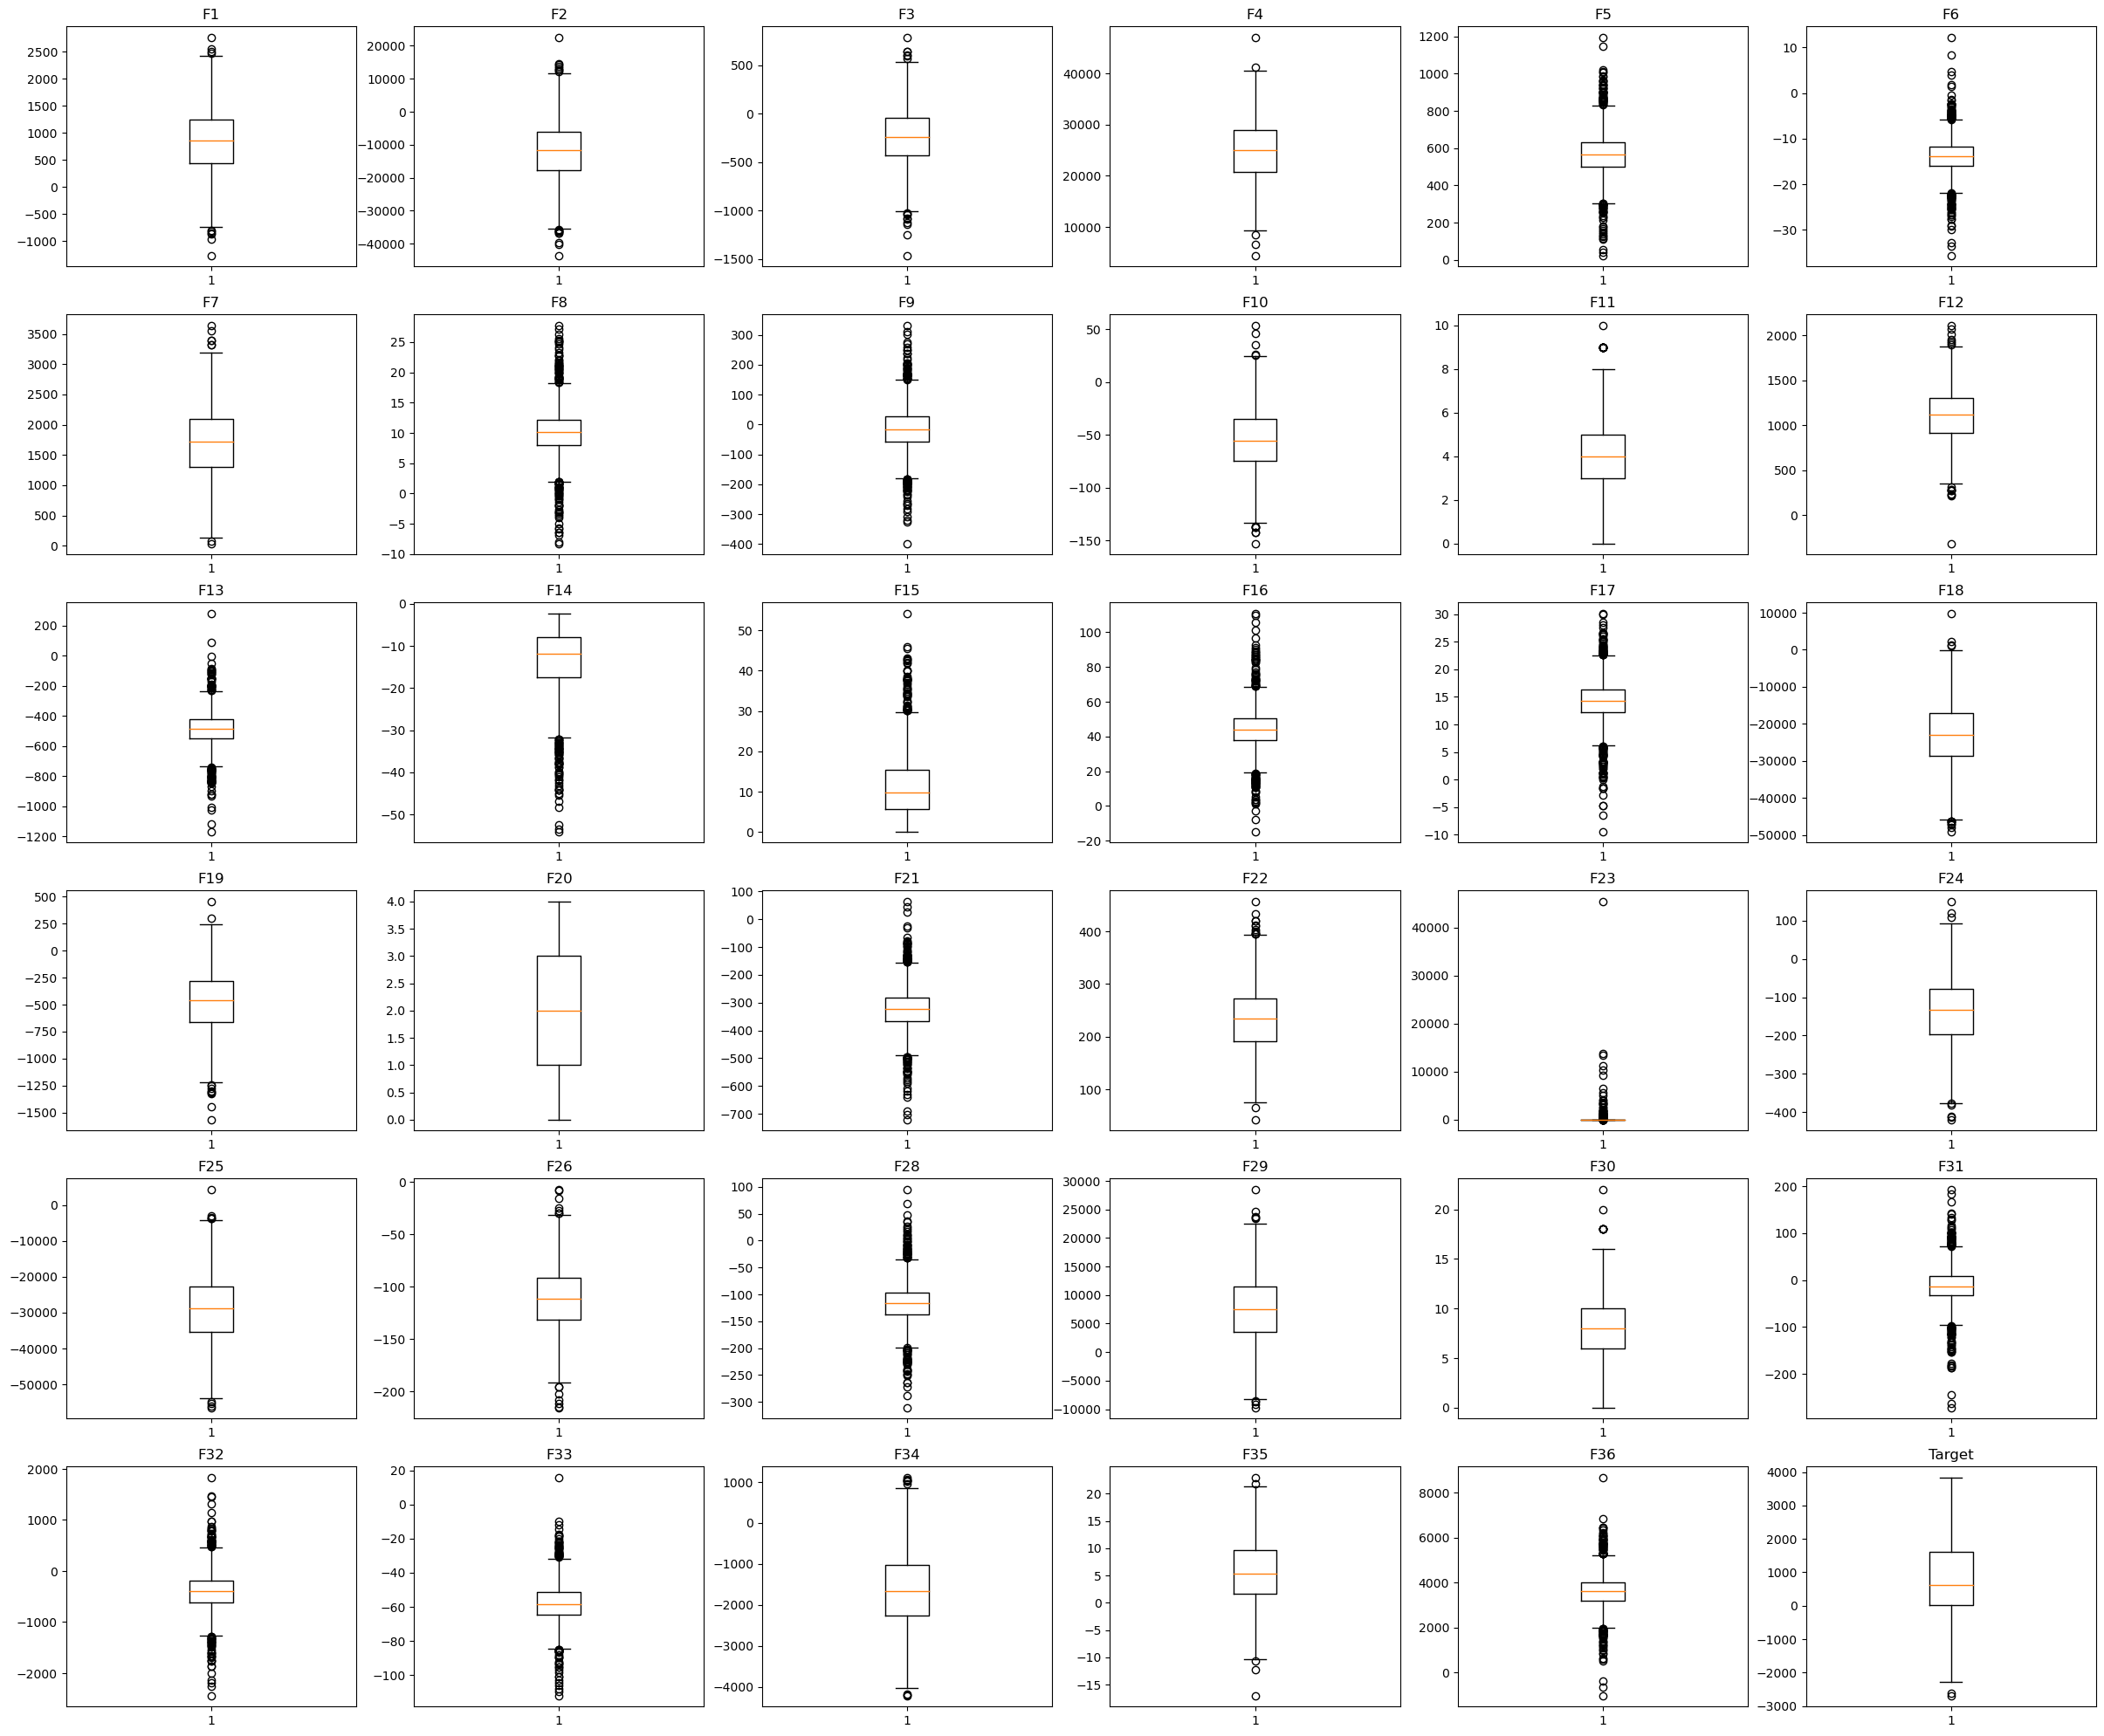

In [16]:
fig, ax = mp.subplots(figsize=(30,25),nrows=6, ncols=6)
i = j = 0
n = 37
col = 6
for k in range(1, n):
    v = 'F' + str(k)
    if v != 'F27':
        ax[i,j].boxplot(Xtrain[v]) 
        ax[i,j].set_title(v)
        j += 1
        if j == col:
            i += 1
            j = 0 
ax[5,5].boxplot(ytrain)
ax[5,5].set_title("Target")
mp.show()

#### Removing Outliers

In [17]:
remove_outliers(Xtrain)

#### After removing outliers

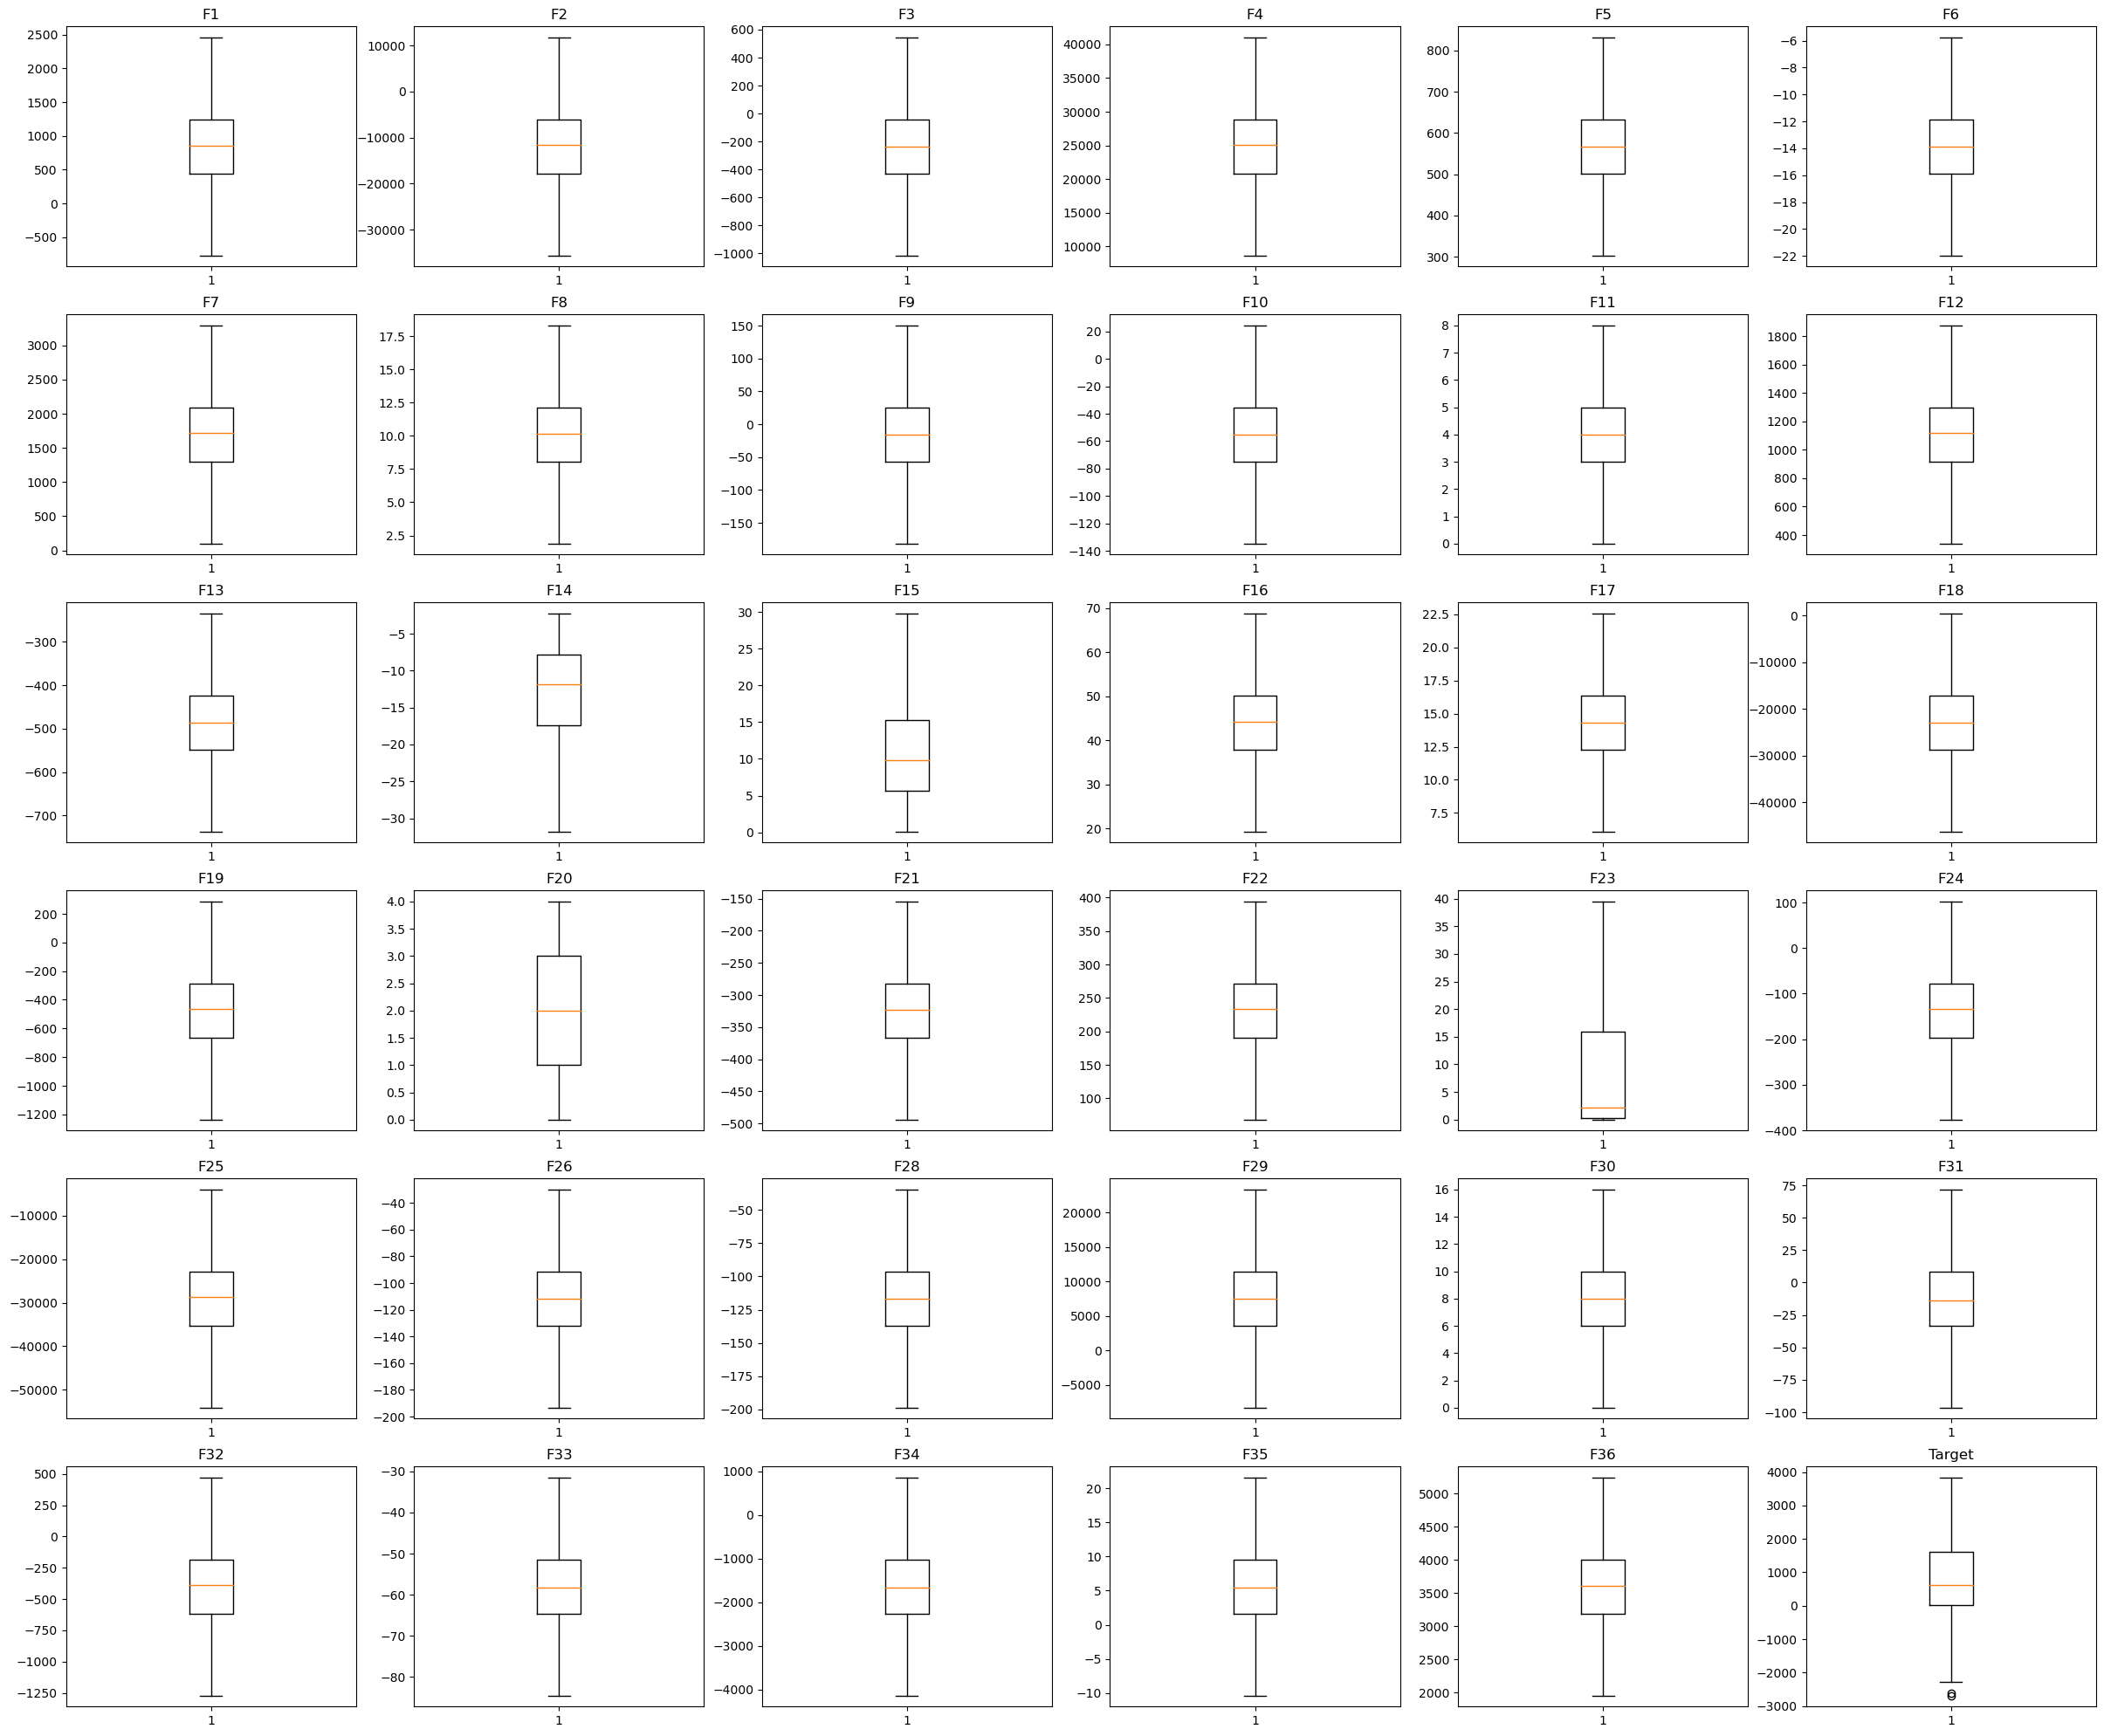

In [18]:
fig, ax = mp.subplots(figsize=(30,25),nrows=6, ncols=6)
i = j = 0
n = 37
col = 6
for k in range(1, n):
    v = 'F' + str(k)
    if v != 'F27':
        ax[i,j].boxplot(Xtrain[v]) 
        ax[i,j].set_title(v)
        j += 1
        if j == col:
            i += 1
            j = 0   
ax[5,5].boxplot(ytrain)
ax[5,5].set_title("Target")
mp.show()

#### Function for ploting r2_score bar graph

In [32]:
def plot_r2_Score_bar_graph(r2_score,title):
    fig = mp.figure(figsize=(7,5))
    fig.suptitle(title, fontsize=12)
    ax = fig.add_axes([0,0,1,1])
    xlocs, xlabs = mp.xticks()
    xlocs=[i for i in range(0,5)]
    for i, v in enumerate(r2_score):
        mp.text(xlocs[i] - 0.25, v + 0.01, str(v))
    models = ['XGBoost', 'Ada Booster', 'Linear Regression', 'Gradient Booster', 'Extra Tree']
    r2score = r2_score
    ax.set_xlabel('Models')
    ax.set_ylabel('r2_Score')
    ax.bar(models,r2score)
    mp.show()

#### Parameter initialization

In [20]:
import xgboost as xg
model_params = model_params = {
    'XGBoost': {
        'model': xg.XGBRegressor(),
        'params' : {
            'max_depth': [4],
           'learning_rate': [.06],
           'n_estimators': [600],
           'colsample_bytree': [.7],
            'gamma' : [.01], 
            'subsample' : [0.70]
        }  
    },
    'Adabooster': {
        'model': AdaBoostRegressor(),
        'params' : {
            'n_estimators': [2000, 3000]
        }
    },
    'Linear Regression' : {
        'model': LinearRegression(),
        'params': {
            
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'max_depth' : range(3,6)
        }
    },
    'Extra Tree Regressor': {
        'model': ExtraTreesRegressor(),
        'params': {
            'n_estimators': [1000, 2000, 3000]     
        }                          
    }
}

#### Hyperparameter tuning

In [26]:
from sklearn.metrics import r2_score

def grid_search(xtrain,ytrain,xval,yval):
    scores = []
    for model_name, mp in model_params.items():
        model =  GridSearchCV(mp['model'], mp['params'], cv=10, verbose=1)
        model.fit(xtrain,ytrain)                            # Training the model using training set
        predict = model.best_estimator_.predict(xval)       # Prediction using validation set
        
        rmse = (mean_squared_error(yval,predict))**(1/2)    # RMSE score
        mae = mean_absolute_error(yval, predict)            # Mean Absolute Error
        mse = mean_squared_error(yval,predict)              #Mean Square Error
        r2score = r2_score(yval, predict)                   # R2_Score

        # Cross Validation score
        
        x_merge = pd.DataFrame(xtrain).append(pd.DataFrame(xval)) # merging training set and validation set for cross validation
        y_merge = pd.DataFrame(ytrain).append(pd.DataFrame(yval))
        y_merge.columns = ["Target"]
        x_merge.columns = [["F1", "F2", "F3","F4","F5","F6", "F7", "F8","F9", "F10","F11","F12","F13", "F14", "F15", "F16","F17", "F18", "F19","F20","F21","F22","F23","F24","F25","F26","F28","F29","F30","F31","F32","F33","F34","F35","F36","F27_Europe","F27_Rest","F27_UK","F27_USA"]]
        cv_results = (cross_val_score(model.best_estimator_,x_merge,y_merge,cv=5))
        
        # Appending the scores and values to the list
        scores.append({
            'model': model_name,
            'best_params': model.best_params_,
            'model_score' : model.best_estimator_.score(xtrain,ytrain),
            'cross_validation' : cv_results.mean(),
            'r2_score' : r2score,
            'rmse' : rmse,
            'mse' : mse,
            'mae' : mae,
            'best_classifier' : model.best_estimator_
            })
    pd.set_option('display.max_colwidth', 0)

    # Data frame contains all valuses in the list
    train_df = pd.DataFrame(scores,columns=['model','model_score','cross_validation','r2_score','rmse','mse','mae','best_params'])
    print(train_df[['model','model_score','cross_validation', 'r2_score', 'rmse','mse','mae','best_params']])
    return train_df

#### Spliting input data into training and validation set

In [22]:
X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.20,random_state=0)

#### Grid Search

In [27]:
grid_df = grid_search(X_train,y_train, X_val,y_val)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
                  model  model_score  cross_validation  r2_score        rmse  \
0  XGBoost               0.997861     0.833798          0.840391  514.854980   
1  Adabooster            0.770190     0.717943          0.746661  648.644296   
2  Linear Regression     0.795757     0.787499          0.800910  575.016847   
3  Gradient Boosting     0.967535     0.810338          0.820851  545.459798   
4  Extra Tree Regressor  1.000000     0.702176          0.730718  668.742782   

             mse         mae  \
0  265075.650178  409.780997   
1  420739.423334  526.034139   
2  330644.374630  474.696600   
3  297526.391729  428.329098   
4  447216.908216  515.568637   

                     

#### Error valuesof each model

In [28]:
error_values = pd.DataFrame(grid_df.drop(columns=['model_score', 'cross_validation', 'r2_score','best_params']))
error_values

,model,rmse,mse,mae
0,XGBoost,514.854980,265075.650178,409.780997
1,Adabooster,648.644296,420739.423334,526.034139
2,Linear Regression,575.016847,330644.374630,474.696600
3,Gradient Boosting,545.459798,297526.391729,428.329098
4,Extra Tree Regressor,668.742782,447216.908216,515.568637


#### Scores of each model

In [29]:
scores = pd.DataFrame(grid_df.drop(columns=['rmse', 'mse', 'mae','best_params']))
scores

,model,model_score,cross_validation,r2_score
0,XGBoost,0.997861,0.833798,0.840391
1,Adabooster,0.770190,0.717943,0.746661
2,Linear Regression,0.795757,0.787499,0.800910
3,Gradient Boosting,0.967535,0.810338,0.820851
4,Extra Tree Regressor,1.000000,0.702176,0.730718


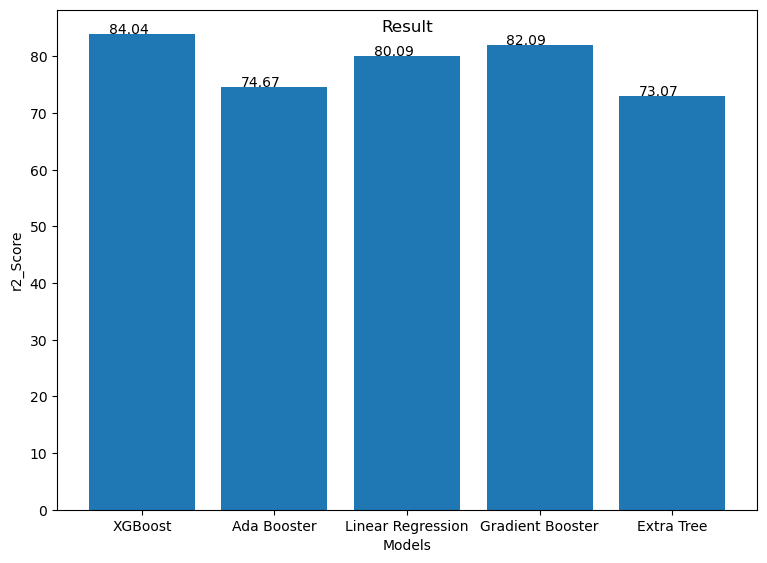

In [33]:
plot_r2_Score_bar_graph(round(grid_df.r2_score*100, 2),'Result')

In [34]:
X_train.shape

(1200, 39)

#### Normalization of training set

In [35]:
x = X_train.values
scaler = preprocessing.MinMaxScaler()
x_scaler = scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaler)
X_train.columns = ["F1", "F2", "F3","F4","F5","F6", "F7", "F8","F9", "F10","F11","F12","F13", "F14", "F15", "F16","F17", "F18", "F19","F20","F21","F22","F23","F24","F25","F26","F28","F29","F30","F31","F32","F33","F34","F35","F36","F27_Europe","F27_Rest","F27_UK","F27_USA"]

#### Normalization of validation set

In [36]:
x = X_val.values
scaler = preprocessing.MinMaxScaler()
x_scaler = scaler.fit_transform(x)
X_val = pd.DataFrame(x_scaler)
X_val.columns = ["F1", "F2", "F3","F4","F5","F6", "F7", "F8","F9", "F10","F11","F12","F13", "F14", "F15", "F16","F17", "F18", "F19","F20","F21","F22","F23","F24","F25","F26","F28","F29","F30","F31","F32","F33","F34","F35","F36","F27_Europe","F27_Rest","F27_UK","F27_USA"]

### Training Model Using XG Boost Regressor

In [37]:
xg_model = xgboost.XGBRegressor(n_estimators=600, learning_rate=0.06, gamma=.02, subsample=0.70,
                          colsample_bytree=.7, max_depth=4)
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_val)

#Cross Validation

x_ada = pd.DataFrame(X_train).append(pd.DataFrame(X_val))
y_ada = pd.DataFrame(y_train).append(pd.DataFrame(y_val))
y_ada.columns = ["Target"]
x_ada.columns = [["F1", "F2", "F3","F4","F5","F6", "F7", "F8","F9", "F10","F11","F12","F13", "F14", "F15", "F16","F17", "F18", "F19","F20","F21","F22","F23","F24","F25","F26","F28","F29","F30","F31","F32","F33","F34","F35","F36","F27_Europe","F27_Rest","F27_UK","F27_USA"]]
print("Cross-validation", cross_val_score(xg_model, x_ada, y_ada, cv=10, scoring ='r2').mean())

#R2 Score
print("r2_score:",r2_score(y_val, y_pred))

# evaluating predictions
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val,y_pred)
rmse = (mean_squared_error(y_val,y_pred))**(1/2)
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % rmse)

Cross-validation 0.8358148120057193
r2_score: 0.8466140755631342
MAE: 398.649
MSE: 254739.974
RMSE: 504.718


### Training Model Using Linear Regression

In [38]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_val)

#Cross Validation
x_ada = pd.DataFrame(X_train).append(pd.DataFrame(X_val))
y_ada = pd.DataFrame(y_train).append(pd.DataFrame(y_val))
y_ada.columns = ["Target"]
x_ada.columns = [["F1", "F2", "F3","F4","F5","F6", "F7", "F8","F9", "F10","F11","F12","F13", "F14", "F15", "F16","F17", "F18", "F19","F20","F21","F22","F23","F24","F25","F26","F28","F29","F30","F31","F32","F33","F34","F35","F36","F27_Europe","F27_Rest","F27_UK","F27_USA"]]
print("Cross-validation", cross_val_score(lr_model, x_ada, y_ada, cv=10, scoring ='r2').mean())

#R2 Score
print("r2_score:",r2_score(y_val, lr_y_pred))

# evaluate predictions
mae = mean_absolute_error(y_val, lr_y_pred)
mse = mean_squared_error(y_val,lr_y_pred)
rmse = (mean_squared_error(y_val,lr_y_pred))**(1/2)
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % rmse)

Cross-validation 0.7858736872299129
r2_score: 0.801935076166592
MAE: 473.195
MSE: 328941.875
RMSE: 573.535


In [41]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_val)

#Cross Validation

x_ada = pd.DataFrame(X_train).append(pd.DataFrame(X_val))
y_ada = pd.DataFrame(y_train).append(pd.DataFrame(y_val))
y_ada.columns = ["Target"]
x_ada.columns = [["F1", "F2", "F3","F4","F5","F6", "F7", "F8","F9", "F10","F11","F12","F13", "F14", "F15", "F16","F17", "F18", "F19","F20","F21","F22","F23","F24","F25","F26","F28","F29","F30","F31","F32","F33","F34","F35","F36","F27_Europe","F27_Rest","F27_UK","F27_USA"]]
print("Cross-validation", cross_val_score(gb_model, x_ada, y_ada, cv=10, scoring ='r2').mean())

#R2 Score
print("r2_score:",r2_score(y_val, gb_y_pred))

# evaluating predictions
mae = mean_absolute_error(y_val, gb_y_pred)
mse = mean_squared_error(y_val,gb_y_pred)
rmse = (mean_squared_error(y_val,gb_y_pred))**(1/2)
print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)
print('RMSE: %.3f' % rmse)

Cross-validation 0.8081085553315743
r2_score: 0.8176402731321306
MAE: 437.533
MSE: 302859.029
RMSE: 550.326


### Part B

In [39]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('/Users/gayathri/Downloads/CE802_P3_Data/CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

#Replacing categorical values with neumerical values
test_data = pd.get_dummies(test_data, columns= ['F27'])                    
cleanup = {'F20': {'Very low': 0, 'Low':1, 'Medium':2,'High':3,'Very high':4}} 
test_data.replace(cleanup, inplace=True)

#Removing Outliers
remove_outliers(test_data)

#Normalizing the test dataset
x = test_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
test_data = pd.DataFrame(x_scaled)
test_data.columns = ["F1", "F2", "F3","F4","F5","F6", "F7", "F8","F9", "F10","F11","F12","F13", "F14", "F15", "F16","F17", "F18", "F19","F20","F21","F22","F23","F24","F25","F26","F28","F29","F30","F31","F32","F33","F34","F35","F36","F27_Europe","F27_Rest","F27_UK","F27_USA"]

# Prediction using XG Boost model
predicted = xg_model.predict(test_data)

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('/Users/gayathri/Downloads/CE802_P3_Data/CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('/Users/gayathri/Downloads/CE802_P3_Data/CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('/Users/gayathri/Downloads/CE802_P3_Data/CE802_P3_Test_Predictions.csv').iloc[:,:-1])